# SDSC3006 Lab 9 PCA, PCR, PLS

TA Email: jiaxin.yu@my.cityu.edu.hk


---


**PCA (Principal Component Analysis)**:
PCA is a dimensionality reduction technique that aims to capture the most important patterns in the data by transforming it into a new set of uncorrelated variables called principal components (PCs).


PCA helps in reducing the dimensionality of the data while retaining as much *variance information* as possible. The transformed PCs can be used for visualization, or further analysis.


**PCR (Principal Component Regression)**:
PCR is a regression technique that combines PCA and linear regression. It first applies PCA to the predictor variables and then performs linear regression on the selected principal components.


PCR combines the dimensionality reduction capability of PCA with the predictive power of linear regression. It can be useful when dealing with high-dimensional data and helps to avoid multicollinearity issues.


**PLS (Partial Least Squares)**:
PLS combines ideas of both PCA and multiple linear regression.
PLS aims to find a set of latent variables that capture the maximum *covariance*  shared between the predictor and response variables.


PLS differs from PCA in that it focuses on the covariance between the predictor and response variables, rather than solely considering the variance of the predictor variables in PCA/PCR.
This makes PLS particularly useful in situations where the number of predictor variables is large compared to the number of observations or when there is strong collinearity among the predictors.


As in other labs, we import some of our libraries at this top level. This makes the code more readable, as scanning the first few lines of the notebook tell us what libraries are used in this notebook.

In [1]:
!pip install ISLP==0.3.19

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 55.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=269f01dce7a451dd2c53c8c0e67b2c43d4969b30546dd9f2871e366d85e02e36
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    U

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl
from ISLP import load_data


We also collect the other imports
needed for PCR.

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import ModelSpec as MS
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots


## Principal Components Analysis



### USArrest Data
In this lab, we perform PCA on  `USArrests`, a data set in the
`R` computing environment.
We retrieve the data using `get_rdataset()`, which can fetch data from
many standard `R` packages.

The rows of the data set contain the 50 states, in alphabetical order.

In [3]:
USArrests = get_rdataset('USArrests').data

# columns represent different variables
# and rows represent different states in the US
USArrests


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [4]:
USArrests.shape

(50, 4)

The columns of the data set contain the four variables.

In [5]:
USArrests.columns


Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

We first briefly examine the data. We notice that the variables have vastly different means.

In [6]:
USArrests.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Dataframes have several useful methods for computing
column-wise summaries. We can also examine the
variance of the four variables using the `var()`  method.

In [7]:
USArrests.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances.
The `UrbanPop` variable measures the percentage of the population
in each state living in an urban area, which is not a comparable
number to the number of rapes in each state per 100,000 individuals.

PCA looks for derived variables that account for most of the variance in the data set.
If we do not scale the variables before performing PCA, then the principal components
would mostly be driven by the
`Assault` variable, since it has by far the largest
variance.  So if the variables are measured in different units or vary widely in scale, it is recommended to standardize the variables to have standard deviation one before performing PCA.
Typically we set the means to zero as well.

This scaling can be done via the `StandardScaler()` transform imported above. We first `fit` the
scaler, which computes the necessary means and standard
deviations and then apply it to our data using the
`transform` method. As before, we combine these steps using the `fit_transform()` method.


In [8]:
# creates a StandardScaler object, and standardize the data
# by subtracting mean and dividing by standard deviation of each feature
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests) # transform data to zero mean, unit variance


Having scaled the data, we can then
perform principal components analysis using the `PCA()` transform
from the `sklearn.decomposition` package.

In [9]:
# creates a PCA object
pcaUS = PCA()


(By default, the `PCA()`  transform centers the variables to have
mean zero though it does not scale them.) The transform `pcaUS`
can be used to find the PCA
`scores` returned by `fit()`. Once the `fit` method has been called, the `pcaUS` object also contains a number of useful quantities.

In [10]:
# fits the PCA model to the standardized data
pcaUS.fit(USArrests_scaled)


PCA()

After fitting, the `mean_` attribute corresponds to the means
of the variables. In this case, since we centered and scaled the data with
`scaler()` the means will all be 0.

In [11]:
pcaUS.mean_


array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

The scores can be computed using the `transform()` method
of `pcaUS` after it has been fit.

In [12]:
# apply PCA to standardized data to obtain PC scores
scores = pcaUS.transform(USArrests_scaled)


We will plot these scores a bit further down.
The `components_` attribute provides the principal component loadings:
each row of `pcaUS.components_` contains the corresponding
principal component loading vector.


In [13]:
# display the PCs of the fitted PCA model:
# Each row represents a principal component,
# Each column represents a feature from the original dataset
pcaUS.components_


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

The `biplot`  is a common visualization method used with
PCA. It is not built in as a standard
part of `sklearn`, though there are python
packages that do produce such plots. Here we
make a simple biplot manually.

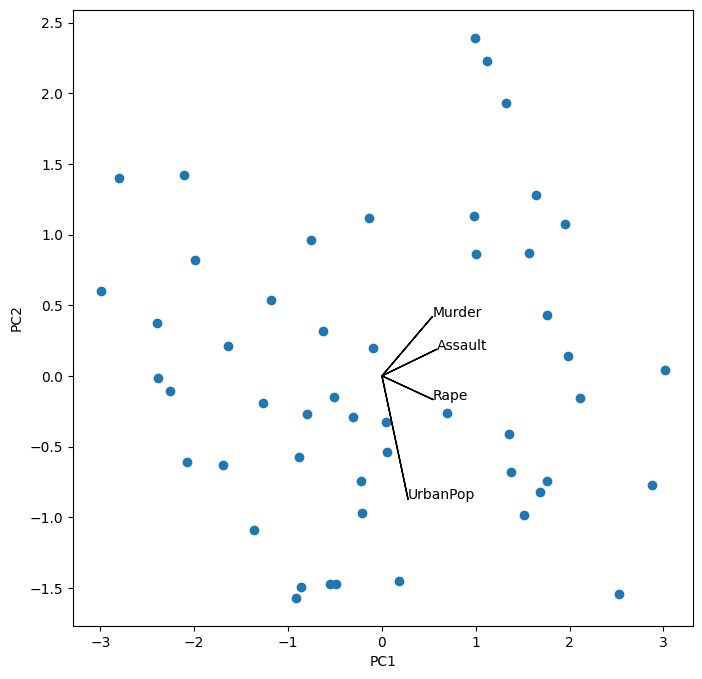

In [14]:
i, j = 0, 1 # specify which principal components to visualize
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]): # iterate over each feature in the PCs.
    # adds an arrow to the plot, visualizing the loading of each feature
    # on the specified principal components.
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    # add labels to the plot, indicating the features names of the arrows.
    ax.text(pcaUS.components_[i,k], pcaUS.components_[j,k], USArrests.columns[k])


Notice that this figure is a reflection of Figure 12.1 through the $y$-axis. Recall that the
principal components are only unique up to a sign change, so we can
reproduce that figure by flipping the
signs of the second set of scores and loadings.
We also increase the length of the arrows to emphasize the loadings.

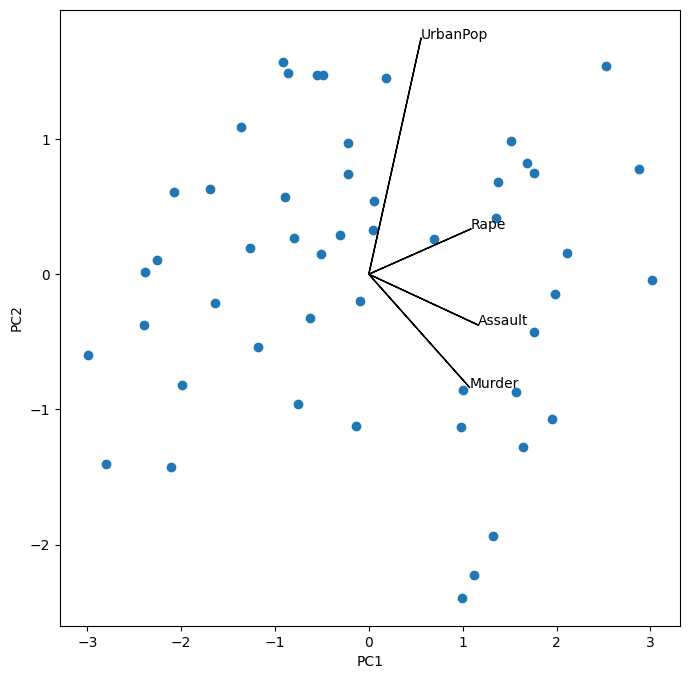

In [15]:
scale_arrow = s_ = 2   # assigns the value 2
scores[:,1] *= -1     # flip the y-axis of scores
pcaUS.components_[1] *= -1 # flip the y-axis of loading
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]): # arrows are scaled with s_
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k], USArrests.columns[k])


The standard deviations of the principal component scores are as follows:

In [16]:
# access standard deviation of the scores along each PC axis
scores.std(0, ddof=1)


array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance of each score can be extracted directly from the `pcaUS` object via
the `explained_variance_` attribute.

In [17]:
pcaUS.explained_variance_


array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

The proportion of variance explained by each principal
component (PVE) is stored as `explained_variance_ratio_`:

In [18]:
pcaUS.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the
variance in the data, the next principal component explains 24.7%
of the variance, and so forth.
We can plot the PVE explained by each component, as well as the cumulative PVE. We first
plot the proportion of variance explained.

In [19]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1 # array of ticks representing the PCs
ax = axes[0]  # assign the first subplot
ax.plot(ticks, pcaUS.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)


Notice the use of `%%capture`, which suppresses the displaying of the partially completed figure.

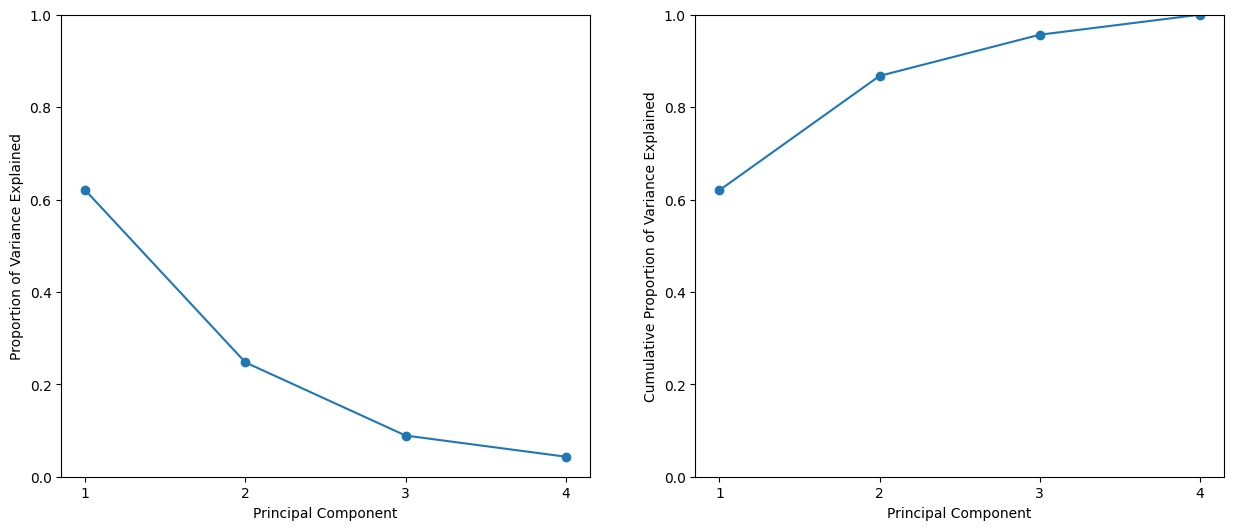

In [20]:
ax = axes[1]  # the second subplot
ax.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig


The result is similar to that shown in Figure 12.3.  Note
that the method `cumsum()`   computes the cumulative sum of
the elements of a numeric vector. For instance:

In [21]:
a = np.array([1,2,8,-3])
np.cumsum(a)


array([ 1,  3, 11,  8])

### NCI60 Data
Unsupervised techniques are often used in the analysis of genomic
data. In particular, PCA and hierarchical clustering are popular
tools.  We illustrate these techniques on the `NCI60`  cancer cell line
microarray data, which consists of 6830 gene expression
measurements on 64 cancer cell lines.

In [22]:
NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']


Each cell line is labeled with a cancer type. We do not make use of
the cancer types in performing PCA, as these are
unsupervised techniques. But after performing PCA, we
will check to see the extent to which these cancer types agree with
the results of these unsupervised techniques.

The data has 64 rows and 6830 columns.

In [23]:
nci_data.shape


(64, 6830)

We begin by examining the cancer types for the cell lines.


In [24]:
nci_labs.value_counts()


label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
dtype: int64

PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes)
to have standard deviation one, although here one could reasonably argue
that it is better not to scale the genes as they are measured in the same units.

In [25]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)


We now plot the first few principal component score vectors, in order
to visualize the data. The observations (cell lines) corresponding to
a given cancer type will be plotted in the same color, so that we can
see to what extent the observations within a cancer type are similar
to each other.

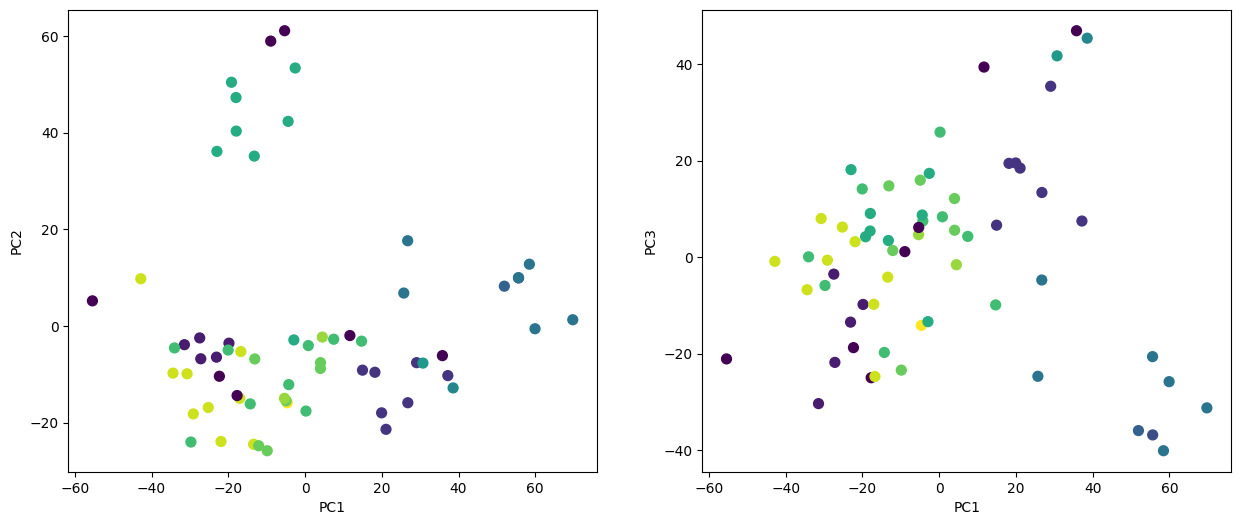

In [26]:
cancer_types = list(np.unique(nci_labs)) # identify different categories
# assign a numerical group index to each cancer type
nci_groups = np.array([cancer_types.index(lab) for lab in nci_labs.values])
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0], nci_scores[:,1], c=nci_groups, marker='o', s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0], nci_scores[:,2], c=nci_groups, marker='o', s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');


On the whole, cell lines corresponding to a single cancer type do tend to
have similar values on the first few principal component score
vectors. This indicates that cell lines from the same cancer type tend
to have pretty similar gene expression levels.


    

We can also plot the percent variance
explained by the principal components as well as the cumulative percent variance explained.
This is similar to the plots we made earlier for the `USArrests` data.

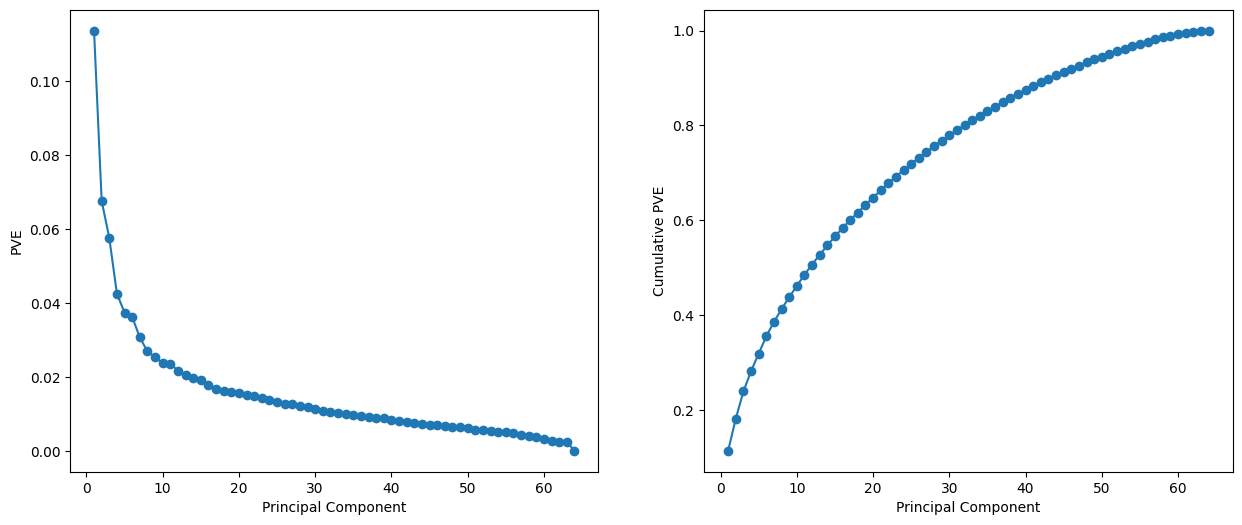

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks, nci_pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks, nci_pca.explained_variance_ratio_.cumsum(), marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');


We see that together, the first seven principal components explain
around 40% of the variance in the data. This is not a huge amount
of the variance. However, looking at the score plot, we see that while
each of the first seven principal components explain a substantial
amount of variance, there is a marked decrease in the variance
explained by further principal components. That is, there is an
*elbow*  in the plot after approximately the seventh
principal component.  This suggests that there may be little benefit
to examining more than seven or so principal components (though even
examining seven principal components may be difficult).

Besides, the Khan Gene Data introduced last week is also high-dimensional, which can be tested with PCA for dimension reduction and PCs visualization.

We know the PCA or PCR could be used for dimension reduction purposes with high-dimensional datasets. However, the issue of collinearity might occur and its covariance matrix may be ill-conditioned. This is what we need to pay attention to.



## Principal Components Regression

Principal components regression (PCR) can be performed using
`PCA()`  from the `sklearn.decomposition`
module. We now apply PCR to the  `Hitters`  data, in order to
predict `Salary`. Again, ensure that the missing values have
been removed from the data, as described in Section 6.5.1.

We use `LinearRegression()`  to fit the regression model
here. Note that it fits an intercept by default, unlike
the `OLS()` function seen earlier in Section 6.5.1.

In [28]:
Hitters = load_data('Hitters')
Hitters = Hitters.dropna();
Hitters.shape


(263, 20)

In [29]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)


In [30]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)


In [31]:
pca = PCA(n_components=2) # retain only the top 2 PCs
linreg = skl.LinearRegression()

# pipeline specifies that the PCA step be applied first,
# followed by the linear regression step
pipe = Pipeline([('pca', pca), ('linreg', linreg)])
# pipeline will perform PCA on X, transform the data using the top 2 PCs,
# and then apply linear regression to predict Y
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_ # retrieves coefficients of linear regression model from pipeline


array([0.09846131, 0.4758765 ])

When performing PCA, the results vary depending
on whether the data has been *standardized* or not.
As in the earlier examples, this can be accomplished
by including an additional step in the pipeline.

In [32]:
# include a scaler step before the PCA step
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([106.36859204, -21.60350456])

We can of course use CV to choose the number of components, by
using `skm.GridSearchCV`, in this
case fixing the parameters to vary the
`n_components`.

In [33]:
K = 5
kfold = skm.KFold(K, random_state=0, shuffle=True)


In [34]:
param_grid = {'pca__n_components': range(1, 20)}
# grid search object to select different combinations of PCs with CV
grid = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

Let's plot the results, i.e., the cross-validated mean squared error (MSE) for different numbers of principal components.

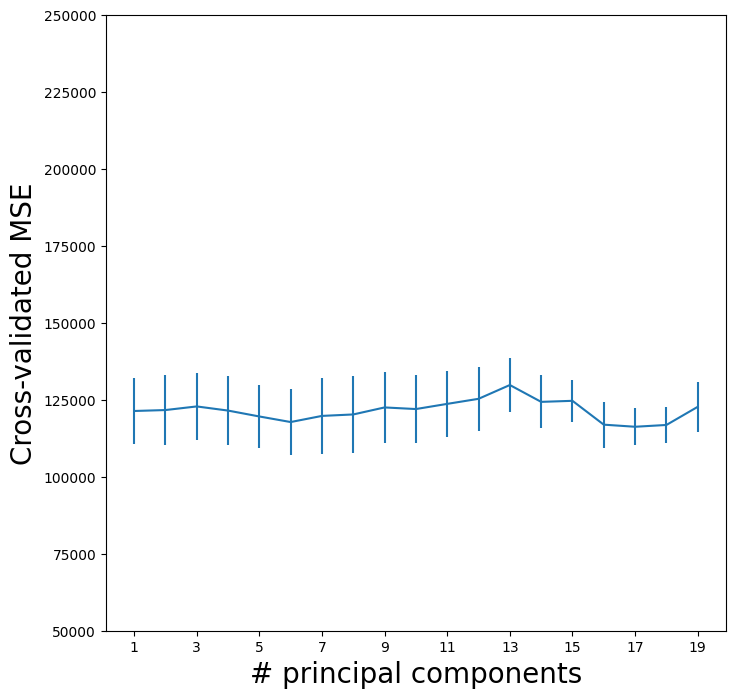

In [35]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp, -grid.cv_results_['mean_test_score'], grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2]) # set x-axis ticks to be every second value from range of PCs
ax.set_ylim([50000,250000]);


We see that the smallest cross-validation error occurs when
17
components are used. However, from the plot we also see that the
cross-validation error is roughly the same when only one component is
included in the model. This suggests that a model that uses just a
small number of components might suffice.

The CV score is provided for each possible number of components from
1 to 19 inclusive. The `PCA()` method complains
if we try to fit an intercept only with `n_components=0`
so we also compute the MSE for just the null model with
these splits.

In [36]:
# array of zeros with the same number of rows as X and a single column,
# it represents the null model, where no principal components are used
Xn = np.zeros((X.shape[0], 1))
# perform CV on the null model, using the linear regression model and null features
cv_null = skm.cross_validate(linreg, Xn, Y, cv=kfold, scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()


204139.30692994667

The `explained_variance_ratio_`
attribute of our `PCA` object provides the *percentage of variance explained* in the predictors and in the response using
different numbers of components. This concept is discussed in greater
detail in Section 12.2.

In [37]:
pipe.named_steps['pca'].explained_variance_ratio_


array([0.3831424 , 0.21841076])

Briefly, we can think of
this as the amount of information about the predictors
that is captured using $M$ principal components. For example, setting
$M=1$ only captures 38.31% of the variance, while $M=2$ captures an additional 21.84%, for a total of 60.15% of the variance.
By  $M=6$ it increases to
88.63%. Beyond this the increments continue to diminish, until we use all $M=p=19$ components, which captures all  100% of the variance.



## Partial Least Squares
Partial least squares (PLS) is implemented in the
`PLSRegression()`  function.



In [38]:
pls = PLSRegression(n_components=2, scale=True)
pls.fit(X, Y)


PLSRegression()

As was the case in PCR, we will want to
use CV to choose the number of components.

In [39]:
param_grid = {'n_components':range(1, 20)}
grid = skm.GridSearchCV(pls, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

As for our other methods, we plot the MSE.

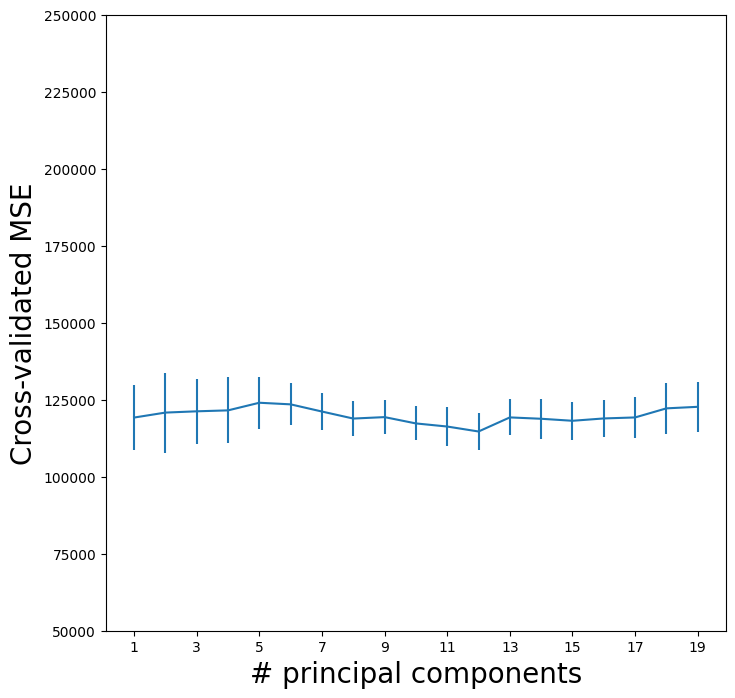

In [40]:
pls_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp, -grid.cv_results_['mean_test_score'], grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([50000,250000]);


CV error is minimized at 12,
though there is little noticable difference between this point and a much lower number like 2 or 3 components.



##Conclusions

Let's summarize the merits and shortcomings of PCA, PCR, and PLS.

Principal Component Analysis (PCA):
- Merits: PCA is a dimensionality reduction technique that helps identify the most important features related to variance. It allows for the visualization and understanding of the underlying structure and relationships within the data. PCA can be useful for noise reduction, data compression, and identifying patterns in high-dimensional data.
- Shortcoming: PCA assumes a linear relationship between variables and may not capture nonlinear relationships.

Principal Component Regression (PCR):
- Merits: PCR combines the benefits of PCA for dimensionality reduction with regression analysis. It allows for the handling of multicollinearity and can improve prediction accuracy by selecting the most variance-informative PCs. PCR can be useful when dealing with high-dimensional datasets and a large number of predictors.
- Shortcomings: PCR may suffer from overfitting if too many principal components are used. During regression, the issue of ill-conditioned covariance matrix may occur.
  *   Ridge Regression (RR): regularization technique that can handle multicollinearity and mitigate overfitting.
  *   LASSO: regularization technique to address multicollinearity and overfitting; variable selection.
  

Partial Least Squares (PLS):
- Merits: PLS is a dimensionality reduction technique similar to PCA but with a focus on maximizing the covariance between the predictors and the response variable, i.e., it considers the information in the response variables while building the regression model.
- Shortcomings: Interpretability is more challenging since PLS transforms both the predictors and the response variables.

In summary, PCA is useful for dimensionality reduction and understanding the structure of the data, while PCR combines PCA with direct regression analysis.
Ridge Regression and LASSO can regularize issues of multicollinearity and overfitting for regression models.
PLS focuses on maximizing predictive power by finding common components that maximize covariance between predictors and the response variable.

The above is a continuous research route, where we can cultivate the ability of critical thinking.
Each method has its own strengths and limitations, and the choice depends on the data properties, the expert knowledge, and the specific goals.